Загружаем библиотеки, необходимые для обработки датасета

In [0]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.preprocessing import StandardScaler, normalize, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics

Создадим три датасета, в которых будем комбинировать колонки возраста и количества день, проведенных в приюте с группировкой по этим колонкам

In [0]:
Analysis = pd.read_csv('Analysis.csv')
Analysis = Analysis.drop(['Unnamed: 0', 'DateTime_in', 'DateTime_out', 'Date of Birth'], axis = 1)
Analysis.head()

,Name_in,Found Location,Intake Type,Intake Condition,Animal Type_in,Age upon Intake,Outcome Type,Age upon Outcome,Breed_out,Color_out,Gender_in,Sterill_in,Sterill_out,group of age_in,days_of_stay,group of stay,dayofweek_in,month_in,day_in,dayofweek_out,month_out,day_out
0,1,2501 Magin Meadow Dr in Austin (TX),Stray,Normal,Dog,2 years,Transfer,2 years,Beagle Mix,Tricolor,Male,1,1,1-3 years,4,0-7 days,3,1,3,1,1,8
1,1,9409 Bluegrass Dr in Austin (TX),Stray,Normal,Dog,8 years,Return to Owner,8 years,English Springer Spaniel,White/Liver,Female,1,1,7-9 years,0,0-7 days,6,7,5,6,7,5
2,1,2818 Palomino Trail in Austin (TX),Stray,Normal,Dog,11 months,Return to Owner,1 year,Basenji Mix,Sable/White,Male,0,1,7-12 months,6,0-7 days,3,4,14,3,4,21
3,0,Austin (TX),Stray,Sick,Cat,4 weeks,Transfer,4 weeks,Domestic Shorthair Mix,Calico,Female,0,0,1-6 weeks,0,0-7 days,0,10,21,0,10,21
4,1,800 Grove Blvd in Austin (TX),Stray,Normal,Dog,4 years,Return to Owner,4 years,Doberman Pinsch/Australian Cattle Dog,Tan/Gray,Male,1,1,4-6 years,3,0-7 days,6,6,29,2,7,2


In [0]:
bez_group = Analysis.drop(['group of age_in', 'group of stay'], axis = 1)
bez_group.head()

,Name_in,Found Location,Intake Type,Intake Condition,Animal Type_in,Age upon Intake,Outcome Type,Age upon Outcome,Breed_out,Color_out,Gender_in,Sterill_in,Sterill_out,days_of_stay,dayofweek_in,month_in,day_in,dayofweek_out,month_out,day_out
0,1,2501 Magin Meadow Dr in Austin (TX),Stray,Normal,Dog,2 years,Transfer,2 years,Beagle Mix,Tricolor,Male,1,1,4,3,1,3,1,1,8
1,1,9409 Bluegrass Dr in Austin (TX),Stray,Normal,Dog,8 years,Return to Owner,8 years,English Springer Spaniel,White/Liver,Female,1,1,0,6,7,5,6,7,5
2,1,2818 Palomino Trail in Austin (TX),Stray,Normal,Dog,11 months,Return to Owner,1 year,Basenji Mix,Sable/White,Male,0,1,6,3,4,14,3,4,21
3,0,Austin (TX),Stray,Sick,Cat,4 weeks,Transfer,4 weeks,Domestic Shorthair Mix,Calico,Female,0,0,0,0,10,21,0,10,21
4,1,800 Grove Blvd in Austin (TX),Stray,Normal,Dog,4 years,Return to Owner,4 years,Doberman Pinsch/Australian Cattle Dog,Tan/Gray,Male,1,1,3,6,6,29,2,7,2


In [0]:
bez_odin = Analysis.drop(['Age upon Intake', 'days_of_stay'], axis = 1)
bez_odin.head()

,Name_in,Found Location,Intake Type,Intake Condition,Animal Type_in,Outcome Type,Age upon Outcome,Breed_out,Color_out,Gender_in,Sterill_in,Sterill_out,group of age_in,group of stay,dayofweek_in,month_in,day_in,dayofweek_out,month_out,day_out
0,1,2501 Magin Meadow Dr in Austin (TX),Stray,Normal,Dog,Transfer,2 years,Beagle Mix,Tricolor,Male,1,1,1-3 years,0-7 days,3,1,3,1,1,8
1,1,9409 Bluegrass Dr in Austin (TX),Stray,Normal,Dog,Return to Owner,8 years,English Springer Spaniel,White/Liver,Female,1,1,7-9 years,0-7 days,6,7,5,6,7,5
2,1,2818 Palomino Trail in Austin (TX),Stray,Normal,Dog,Return to Owner,1 year,Basenji Mix,Sable/White,Male,0,1,7-12 months,0-7 days,3,4,14,3,4,21
3,0,Austin (TX),Stray,Sick,Cat,Transfer,4 weeks,Domestic Shorthair Mix,Calico,Female,0,0,1-6 weeks,0-7 days,0,10,21,0,10,21
4,1,800 Grove Blvd in Austin (TX),Stray,Normal,Dog,Return to Owner,4 years,Doberman Pinsch/Australian Cattle Dog,Tan/Gray,Male,1,1,4-6 years,0-7 days,6,6,29,2,7,2


Переведем данные каждого датасета из категориальных значений в цифровые

In [0]:
columns = ['Found Location', 'Intake Type', 'Intake Condition', 'Animal Type_in',
           'Age upon Intake', 'Outcome Type', 'Age upon Outcome', 'Breed_out', 
           'Color_out', 'Gender_in', 'Sterill_in', 'Sterill_out', 'group of age_in', 
           'days_of_stay', 'group of stay']

def encoder(df):
    for col in columns:
        label_encoder = LabelEncoder()
        label_encoder.fit(df[col])
        df[col] = label_encoder.transform(df[col])
    return df

Analysis = encoder (Analysis)
Analysis.head()

,Name_in,Found Location,Intake Type,Intake Condition,Animal Type_in,Age upon Intake,Outcome Type,Age upon Outcome,Breed_out,Color_out,Gender_in,Sterill_in,Sterill_out,group of age_in,days_of_stay,group of stay,dayofweek_in,month_in,day_in,dayofweek_out,month_out,day_out
0,1,13510,3,5,1,22,6,23,285,461,1,1,1,0,4,0,3,1,3,1,1,8
1,1,29914,3,5,1,44,5,50,1097,513,0,1,1,5,0,0,6,7,5,6,7,5
2,1,14512,3,5,1,9,5,6,252,389,1,0,1,4,6,0,3,4,14,3,4,21
3,0,31176,3,9,0,32,6,35,1046,202,0,0,0,2,0,0,0,10,21,0,10,21
4,1,26749,3,5,1,33,5,36,1012,425,1,1,1,3,3,0,6,6,29,2,7,2


In [0]:
columns = ['Found Location', 'Intake Type', 'Intake Condition', 'Animal Type_in','Age upon Intake', 'Outcome Type', 'Age upon Outcome', 'Breed_out', 'Color_out', 'Gender_in', 'Sterill_in', 'Sterill_out', 'days_of_stay']

def encoder(df):
    for col in columns:
        label_encoder = LabelEncoder()
        label_encoder.fit(df[col])
        df[col] = label_encoder.transform(df[col])
    return df

bez_group = encoder (bez_group)
bez_group.head()

,Name_in,Found Location,Intake Type,Intake Condition,Animal Type_in,Age upon Intake,Outcome Type,Age upon Outcome,Breed_out,Color_out,Gender_in,Sterill_in,Sterill_out,days_of_stay,dayofweek_in,month_in,day_in,dayofweek_out,month_out,day_out
0,1,13510,3,5,1,22,6,23,285,461,1,1,1,4,3,1,3,1,1,8
1,1,29914,3,5,1,44,5,50,1097,513,0,1,1,0,6,7,5,6,7,5
2,1,14512,3,5,1,9,5,6,252,389,1,0,1,6,3,4,14,3,4,21
3,0,31176,3,9,0,32,6,35,1046,202,0,0,0,0,0,10,21,0,10,21
4,1,26749,3,5,1,33,5,36,1012,425,1,1,1,3,6,6,29,2,7,2


In [0]:
columns = ['Found Location', 'Intake Type', 'Intake Condition', 'Animal Type_in',  'Outcome Type', 'Age upon Outcome', 'Breed_out', 'Color_out', 'Gender_in', 'Sterill_in', 'Sterill_out', 'group of age_in', 'group of stay']

def encoder(df):
    for col in columns:
        label_encoder = LabelEncoder()
        label_encoder.fit(df[col])
        df[col] = label_encoder.transform(df[col])
    return df

bez_odin = encoder (bez_odin)
bez_odin.head()

,Name_in,Found Location,Intake Type,Intake Condition,Animal Type_in,Outcome Type,Age upon Outcome,Breed_out,Color_out,Gender_in,Sterill_in,Sterill_out,group of age_in,group of stay,dayofweek_in,month_in,day_in,dayofweek_out,month_out,day_out
0,1,13510,3,5,1,6,23,285,461,1,1,1,0,0,3,1,3,1,1,8
1,1,29914,3,5,1,5,50,1097,513,0,1,1,5,0,6,7,5,6,7,5
2,1,14512,3,5,1,5,6,252,389,1,0,1,4,0,3,4,14,3,4,21
3,0,31176,3,9,0,6,35,1046,202,0,0,0,2,0,0,10,21,0,10,21
4,1,26749,3,5,1,5,36,1012,425,1,1,1,3,0,6,6,29,2,7,2


Посчитаем матрицу корреляций и фичи таргет-переменной для каждого датасета, а также построим графики распределений

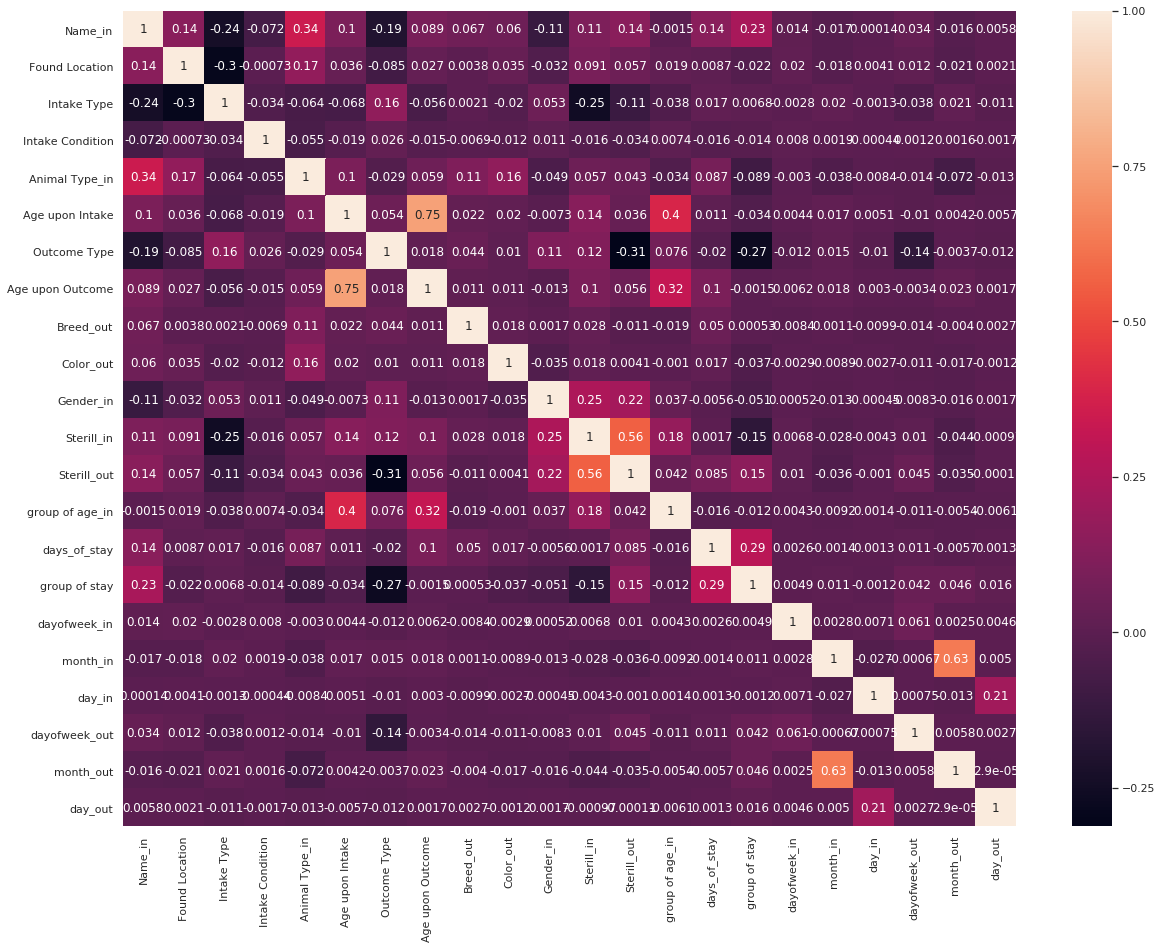

In [0]:
corr_matrix = Analysis.corr()
sns.set(rc={'figure.figsize':(20, 15)})
sns.heatmap(corr_matrix, annot = True, xticklabels = corr_matrix.columns.values,
            yticklabels = corr_matrix.columns.values)

In [0]:
corrmat = Analysis.corr()
fcor=corrmat.abs().unstack().sort_values(ascending=False).reset_index()
fcor.columns = ['Feature_1', 'Feature_2','r']
fcor.query('Feature_2 !="Outcome Type" & Feature_1 == "Outcome Type"').head()

,Feature_1,Feature_2,r
34,Outcome Type,Sterill_out,0.311549
40,Outcome Type,group of stay,0.267764
55,Outcome Type,Name_in,0.193838
60,Outcome Type,Intake Type,0.164483
74,Outcome Type,dayofweek_out,0.140677


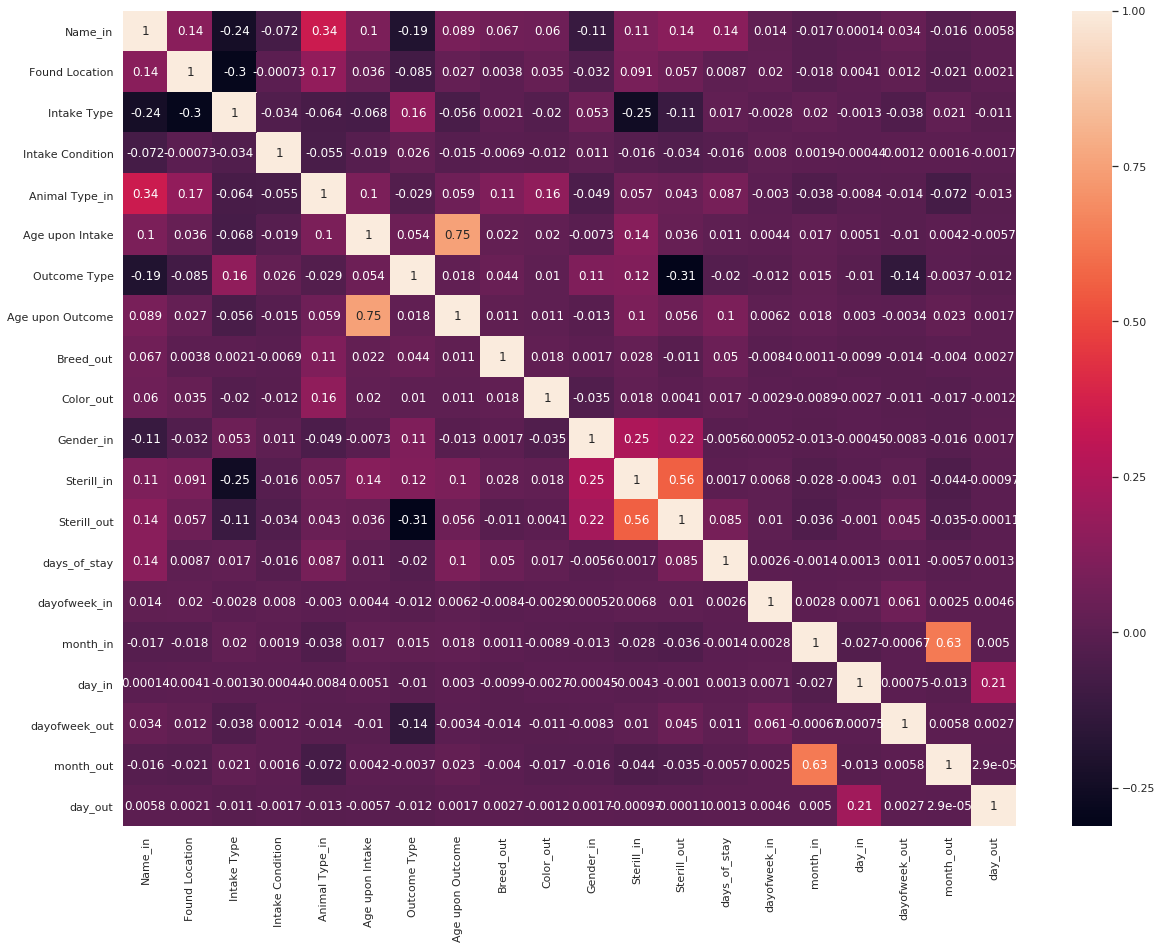

In [0]:
corr_matrix = bez_group.corr()
sns.set(rc={'figure.figsize':(20, 15)})
sns.heatmap(corr_matrix, annot = True, xticklabels = corr_matrix.columns.values,yticklabels = corr_matrix.columns.values)

In [0]:
corrmat = bez_group.corr()
fcor=corrmat.abs().unstack().sort_values(ascending=False).reset_index()
fcor.columns = ['Feature_1', 'Feature_2','r']
fcor.query('Feature_2 !="Outcome Type" & Feature_1 == "Outcome Type"').head()

,Feature_1,Feature_2,r
29,Outcome Type,Sterill_out,0.311549
43,Outcome Type,Name_in,0.193838
47,Outcome Type,Intake Type,0.164483
56,Outcome Type,dayofweek_out,0.140677
60,Outcome Type,Sterill_in,0.117138


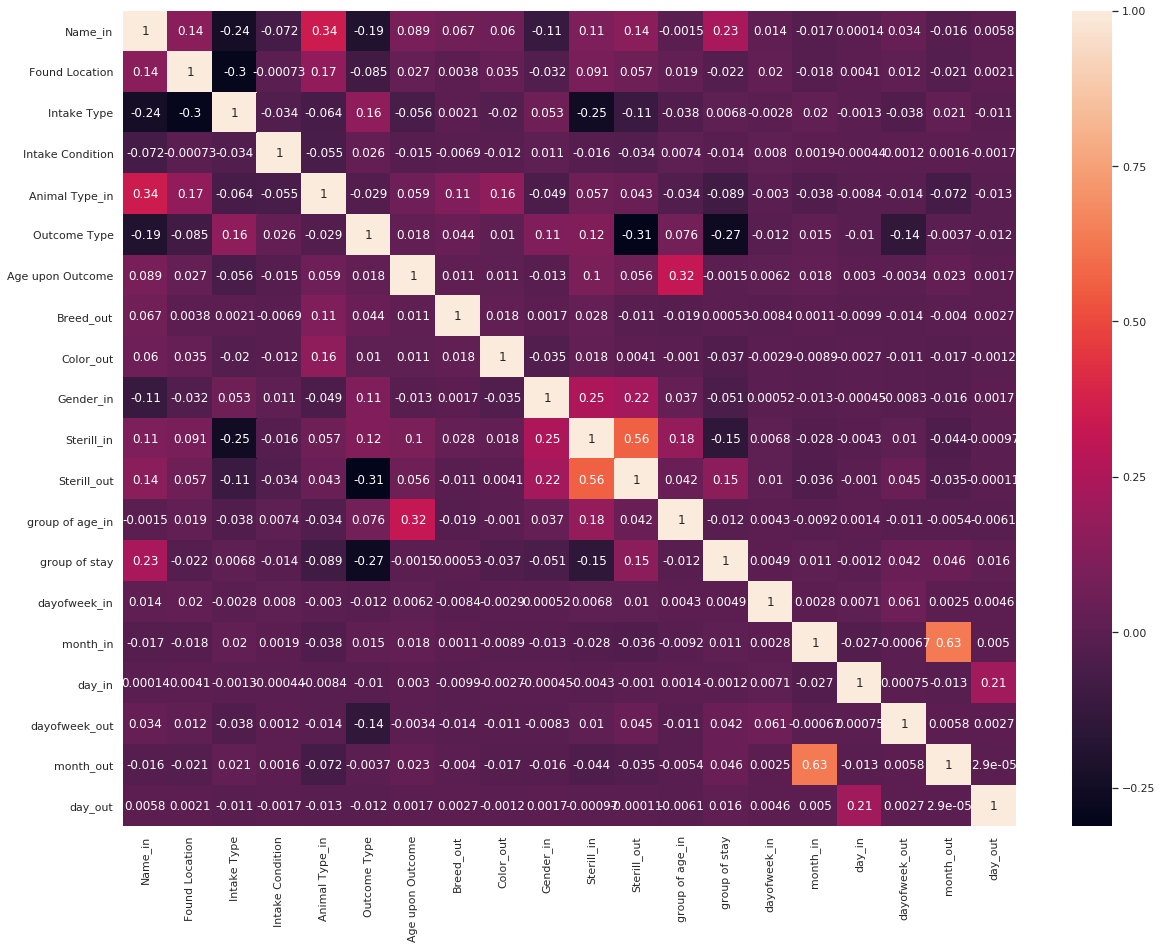

In [0]:
corr_matrix = bez_odin.corr()
sns.set(rc={'figure.figsize':(20, 15)})
sns.heatmap(corr_matrix, annot = True, xticklabels = corr_matrix.columns.values,yticklabels = corr_matrix.columns.values)

In [0]:
corrmat = bez_odin.corr()
fcor=corrmat.abs().unstack().sort_values(ascending=False).reset_index()
fcor.columns = ['Feature_1', 'Feature_2','r']
fcor.query('Feature_2 !="Outcome Type" & Feature_1 == "Outcome Type"').head()

,Feature_1,Feature_2,r
28,Outcome Type,Sterill_out,0.311549
32,Outcome Type,group of stay,0.267764
47,Outcome Type,Name_in,0.193838
53,Outcome Type,Intake Type,0.164483
65,Outcome Type,dayofweek_out,0.140677


**Нормализуем, разделим на трейн и тест, попробуем предсказать значение в датасете Analysis**

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
import xgboost

In [0]:
Analysis = Analysis.rename({'Outcome Type': 'Outcome_Type'}, axis = 1)

In [0]:
X = Analysis.drop(['Outcome_Type'], axis=1)
y = Analysis.Outcome_Type

In [0]:
col = X.columns
X = StandardScaler().fit_transform(X)
X = pd.DataFrame(X, columns=col).astype('float64')
X.head()

,Name_in,Found Location,Intake Type,Intake Condition,Animal Type_in,Age upon Intake,Age upon Outcome,Breed_out,Color_out,Gender_in,Sterill_in,Sterill_out,group of age_in,days_of_stay,group of stay,dayofweek_in,month_in,day_in,dayofweek_out,month_out,day_out
0,0.534060,-0.898370,0.635602,-0.031988,0.708876,-0.002659,-0.091491,-1.727230,1.292597,0.762811,0.978153,0.413563,-0.843764,-0.293124,-0.689946,0.029943,-1.699980,-1.432701,-1.025100,-1.709545,-0.898507
1,0.534060,0.453304,0.635602,-0.031988,0.708876,1.635526,1.798415,-0.130832,1.592643,-1.049851,0.978153,0.413563,1.786836,-0.319636,-0.689946,1.532512,0.131512,-1.204700,1.426508,0.102784,-1.241475
2,0.534060,-0.815806,0.635602,-0.031988,0.708876,-0.970677,-1.281432,-1.792108,0.877149,0.762811,-0.821611,0.413563,1.260716,-0.279868,-0.689946,0.029943,-0.784234,-0.178693,-0.044457,-0.803380,0.587692
3,-1.872448,0.557291,0.635602,4.891684,-1.410684,0.741970,0.748467,-0.231099,-0.201863,-1.049851,-0.821611,-1.738732,0.208476,-0.319636,-0.689946,-1.472626,1.047258,0.619313,-1.515422,1.008949,0.587692
4,0.534060,0.192511,0.635602,-0.031988,0.708876,0.816433,0.818464,-0.297943,1.084873,0.762811,0.978153,0.413563,0.734596,-0.299752,-0.689946,1.532512,-0.173737,1.531319,-0.534779,0.102784,-1.584444


In [0]:
X_train, X_test, y_train, y_test = train_test_split (X,y, test_size = 0.3, random_state = 42)

Random Forest

In [0]:
clf_rf = RandomForestClassifier()

In [0]:
parametrs = {'n_estimators': range(10,50,100), 'max_depth' :range(1,5,9), 'criterion': ['gini', 'entropy']}

In [0]:
grid_search_cv_clf = GridSearchCV(clf_rf, parametrs, cv=5)
grid_search_cv_clf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [0]:
grid_search_cv_clf.best_params_

{'criterion': 'gini', 'max_depth': 1, 'n_estimators': 10}

In [0]:
best_clf = grid_search_cv_clf.best_estimator_
feature_importance = best_clf.feature_importances_
feature_importances_df = pd.DataFrame({'features': list(X_train), 'feature_importances' : feature_importance})
feature_importances_df.sort_values('feature_importances', ascending=False)

,features,feature_importances
0,Name_in,0.2
13,days_of_stay,0.2
2,Intake Type,0.1
4,Animal Type_in,0.1
6,Age upon Outcome,0.1
7,Breed_out,0.1
9,Gender_in,0.1
14,group of stay,0.1
19,month_out,0.0
18,dayofweek_out,0.0


In [0]:
y_pred = best_clf.predict(X_test)

In [0]:
best_clf.score(X_test, y_test)

0.4877735513510843

In [0]:
y_predicted_prob = best_clf.predict_proba(X_test)
y_predicted_prob[:10]

array([[4.39801022e-01, 5.60180448e-03, 4.39240732e-04, 2.88132155e-02,
        5.02147495e-04, 2.79853872e-01, 2.44988698e-01],
       [5.06916698e-01, 4.82233457e-03, 3.50111695e-04, 2.10601638e-02,
        6.72230115e-04, 2.57184017e-01, 2.08994444e-01],
       [4.10528016e-01, 5.18301050e-03, 4.01317572e-04, 2.72189578e-02,
        5.44833678e-04, 3.20226443e-01, 2.35897421e-01],
       [5.09988991e-01, 5.45772846e-03, 4.33706444e-04, 2.20007229e-02,
        6.41018948e-04, 2.37284068e-01, 2.24193764e-01],
       [3.25679899e-01, 1.32844989e-02, 1.18915127e-03, 4.66964748e-02,
        4.93633106e-04, 1.92349075e-01, 4.20307268e-01],
       [4.83818651e-01, 6.45055328e-03, 4.99072612e-04, 2.50416333e-02,
        5.84591159e-04, 2.23802834e-01, 2.59802665e-01],
       [3.25679899e-01, 1.32844989e-02, 1.18915127e-03, 4.66964748e-02,
        4.93633106e-04, 1.92349075e-01, 4.20307268e-01],
       [5.06916698e-01, 4.82233457e-03, 3.50111695e-04, 2.10601638e-02,
        6.72230115e-04, 2

In [0]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[18436     0     0     0     0     0     7]
 [  195     0     0     0     0     0    39]
 [   10     0     0     0     0     0     4]
 [  994     0     0     0     0     0   124]
 [   29     0     0     0     0     0     0]
 [10070     0     0     0     0     0    13]
 [ 9253     0     0     0     0     0  1312]]
              precision    recall  f1-score   support

           0       0.47      1.00      0.64     18443
           1       0.00      0.00      0.00       234
           2       0.00      0.00      0.00        14
           3       0.00      0.00      0.00      1118
           4       0.00      0.00      0.00        29
           5       0.00      0.00      0.00     10083
           6       0.88      0.12      0.22     10565

    accuracy                           0.49     40486
   macro avg       0.19      0.16      0.12     40486
weighted avg       0.44      0.49      0.35     40486



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [0]:
import numpy as np
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Squared Error: 3.8397833500691236


Logistic regression

In [0]:
skm = LogisticRegression(multi_class='multinomial', solver='newton-cg')

In [0]:
skm.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
skm.intercept_, skm.coef_

(array([ 3.68711176, -1.35667338, -4.76774962,  0.54998508, -3.73458471,
         2.52349884,  3.09841203]),
 array([[ 4.01788041e-01,  5.93329778e-02, -3.10180793e-01,
         -7.74385912e-02,  7.83572884e-02, -9.86485035e-02,
          1.04161526e-01, -1.56569455e-01,  1.53458145e-02,
         -3.64258215e-01, -1.22020493e+00,  1.63637043e+00,
         -2.43294622e-02, -5.86309109e-02, -3.24397205e-02,
          5.69408390e-02, -1.00598724e-01,  3.10825997e-02,
          2.48568174e-01,  1.02846818e-01,  4.56099607e-02],
        [-3.73780579e-01,  3.13196429e-02, -3.65015625e-02,
          3.84438402e-02, -3.81115814e-01, -6.68106654e-02,
         -1.34217363e-01, -1.60069603e-01,  4.43252447e-02,
          2.09291802e-01,  4.48924369e-01, -6.33753885e-01,
          2.71376212e-01,  1.13584006e-01,  2.27456903e-01,
          1.47332042e-01, -2.56420870e-01, -1.25464226e-02,
         -2.50570418e-03,  2.36372552e-01, -4.37005298e-02],
        [-9.53482015e-01, -8.33158975e-02,  1.520

In [0]:
y_pred=skm.predict(X_test)
skm.score(X_test,y_test)

0.7006372573235192

In [0]:
y_predicted_prob = skm.predict_proba(X_test)
y_predicted_prob

array([[4.30929176e-01, 3.93035016e-03, 2.98287769e-05, ...,
        8.09514755e-06, 3.21054446e-01, 2.06943781e-01],
       [9.40153573e-01, 9.82687680e-05, 5.70574787e-06, ...,
        1.28907995e-04, 2.31198247e-02, 3.49651985e-02],
       [5.83626236e-01, 2.90946643e-04, 1.47678467e-05, ...,
        7.62223834e-05, 3.02249926e-01, 1.09767591e-01],
       ...,
       [8.12949267e-01, 1.30704293e-03, 1.63237802e-05, ...,
        2.22035664e-03, 3.33515502e-02, 1.45135272e-01],
       [2.20922355e-01, 1.10685146e-03, 3.45544069e-05, ...,
        1.54100043e-04, 6.78806658e-01, 9.15055365e-02],
       [4.84544678e-02, 4.89748764e-02, 2.04809842e-03, ...,
        5.63393627e-04, 1.47384543e-02, 7.90337646e-01]])

In [0]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[15465     0     0     0     0  2051   927]
 [   35     0     0     0     0    13   186]
 [    1     0     0     0     0     3    10]
 [  267     0     0     0     0   146   705]
 [    6     0     0     0     0    14     9]
 [ 2587     0     0     0     0  6940   556]
 [ 3162     0     0     0     0  1442  5961]]
              precision    recall  f1-score   support

           0       0.72      0.84      0.77     18443
           1       0.00      0.00      0.00       234
           2       0.00      0.00      0.00        14
           3       0.00      0.00      0.00      1118
           4       0.00      0.00      0.00        29
           5       0.65      0.69      0.67     10083
           6       0.71      0.56      0.63     10565

    accuracy                           0.70     40486
   macro avg       0.30      0.30      0.30     40486
weighted avg       0.68      0.70      0.68     40486



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [0]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Squared Error: 2.6284799376429553


KNeighborsClassifier

In [0]:
classifier = KNeighborsClassifier(n_neighbors=7)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [0]:
y_pred = classifier.predict(X_test)

In [0]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[15879     1     0    23     0  1725   815]
 [   37     5     0    33     0    10   149]
 [    2     0     0     3     0     1     8]
 [  237     4     0   281     0   160   436]
 [    8     0     0     0     0    11    10]
 [ 2469     0     0    26     0  7072   516]
 [ 3062     7     0   189     0  1253  6054]]
              precision    recall  f1-score   support

           0       0.73      0.86      0.79     18443
           1       0.29      0.02      0.04       234
           2       0.00      0.00      0.00        14
           3       0.51      0.25      0.34      1118
           4       0.00      0.00      0.00        29
           5       0.69      0.70      0.70     10083
           6       0.76      0.57      0.65     10565

    accuracy                           0.72     40486
   macro avg       0.43      0.34      0.36     40486
weighted avg       0.72      0.72      0.71     40486



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [0]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Squared Error: 2.531591630256356


Xgboost

In [0]:
model = xgboost.XGBClassifier()

In [0]:
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [0]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[16790     0     0     0     0  1066   587]
 [   36     0     0    16     0    10   172]
 [    1     0     0     3     0     2     8]
 [  234     0     0   273     0   128   483]
 [    9     0     0     0     1     7    12]
 [ 2085     0     0    13     1  7533   451]
 [ 3393     1     0   116     0   653  6402]]
              precision    recall  f1-score   support

           0       0.74      0.91      0.82     18443
           1       0.00      0.00      0.00       234
           2       0.00      0.00      0.00        14
           3       0.65      0.24      0.35      1118
           4       0.50      0.03      0.06        29
           5       0.80      0.75      0.77     10083
           6       0.79      0.61      0.69     10565

    accuracy                           0.77     40486
   macro avg       0.50      0.36      0.39     40486
weighted avg       0.76      0.77      0.75     40486



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [0]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Squared Error: 2.415176619022297


**Нормализуем, разделим на трейн и тест, попробуем предсказать значение в датасете bez_group**

In [0]:
bez_group = bez_group.rename({'Outcome Type': 'Outcome_Type'}, axis = 1)

In [0]:
X = bez_group.drop(['Outcome_Type'], axis=1)
y = bez_group.Outcome_Type

In [0]:
col = X.columns
X = StandardScaler().fit_transform(X)
X = pd.DataFrame(X, columns=col).astype('float64')
X.head()

,Name_in,Found Location,Intake Type,Intake Condition,Animal Type_in,Age upon Intake,Age upon Outcome,Breed_out,Color_out,Gender_in,Sterill_in,Sterill_out,days_of_stay,dayofweek_in,month_in,day_in,dayofweek_out,month_out,day_out
0,0.534060,-0.898370,0.635602,-0.031988,0.708876,-0.002659,-0.091491,-1.727230,1.292597,0.762811,0.978153,0.413563,-0.293124,0.029943,-1.699980,-1.432701,-1.025100,-1.709545,-0.898507
1,0.534060,0.453304,0.635602,-0.031988,0.708876,1.635526,1.798415,-0.130832,1.592643,-1.049851,0.978153,0.413563,-0.319636,1.532512,0.131512,-1.204700,1.426508,0.102784,-1.241475
2,0.534060,-0.815806,0.635602,-0.031988,0.708876,-0.970677,-1.281432,-1.792108,0.877149,0.762811,-0.821611,0.413563,-0.279868,0.029943,-0.784234,-0.178693,-0.044457,-0.803380,0.587692
3,-1.872448,0.557291,0.635602,4.891684,-1.410684,0.741970,0.748467,-0.231099,-0.201863,-1.049851,-0.821611,-1.738732,-0.319636,-1.472626,1.047258,0.619313,-1.515422,1.008949,0.587692
4,0.534060,0.192511,0.635602,-0.031988,0.708876,0.816433,0.818464,-0.297943,1.084873,0.762811,0.978153,0.413563,-0.299752,1.532512,-0.173737,1.531319,-0.534779,0.102784,-1.584444


In [0]:
X_train, X_test, y_train, y_test = train_test_split (X,y, test_size = 0.3, random_state = 42)

Random Forest

In [0]:
clf_rf = RandomForestClassifier()

In [0]:
parametrs = {'n_estimators': range(10,50,100), 'max_depth' :range(1,5,9), 'criterion': ['gini', 'entropy']}

In [0]:
grid_search_cv_clf = GridSearchCV(clf_rf, parametrs, cv=5)
grid_search_cv_clf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [0]:
grid_search_cv_clf.best_params_

{'criterion': 'gini', 'max_depth': 1, 'n_estimators': 10}

In [0]:
best_clf = grid_search_cv_clf.best_estimator_
feature_importance = best_clf.feature_importances_
feature_importances_df = pd.DataFrame({'features': list(X_train), 'feature_importances' : feature_importance})
feature_importances_df.sort_values('feature_importances', ascending=False)

,features,feature_importances
4,Animal Type_in,0.4
7,Breed_out,0.2
9,Gender_in,0.1
2,Intake Type,0.1
10,Sterill_in,0.1
11,Sterill_out,0.1
12,days_of_stay,0.0
17,month_out,0.0
16,dayofweek_out,0.0
15,day_in,0.0


In [0]:
y_pred = best_clf.predict(X_test)

In [0]:
best_clf.score(X_test, y_test)

0.48001778392530753

In [0]:
y_predicted_prob = best_clf.predict_proba(X_test)
y_predicted_prob[:10]

array([[4.98052618e-01, 4.91446253e-03, 3.99850699e-04, 2.44573014e-02,
        4.59217066e-04, 2.50367467e-01, 2.21349083e-01],
       [4.64421273e-01, 3.99112724e-03, 3.60949743e-04, 2.25643667e-02,
        5.67995069e-04, 3.11181750e-01, 1.96912539e-01],
       [4.64421273e-01, 3.99112724e-03, 3.60949743e-04, 2.25643667e-02,
        5.67995069e-04, 3.11181750e-01, 1.96912539e-01],
       [4.71077853e-01, 5.25092862e-03, 4.43402160e-04, 2.43191297e-02,
        4.97827759e-04, 2.70857968e-01, 2.27552891e-01],
       [3.75739705e-01, 1.52732299e-02, 1.84651318e-03, 4.49206977e-02,
        7.42993875e-04, 1.13407346e-01, 4.48069515e-01],
       [4.70286773e-01, 9.89355949e-03, 6.96382160e-04, 3.18034906e-02,
        6.47662989e-04, 1.58067800e-01, 3.28604332e-01],
       [3.75739705e-01, 1.52732299e-02, 1.84651318e-03, 4.49206977e-02,
        7.42993875e-04, 1.13407346e-01, 4.48069515e-01],
       [4.64421273e-01, 3.99112724e-03, 3.60949743e-04, 2.25643667e-02,
        5.67995069e-04, 3

In [0]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[18443     0     0     0     0     0     0]
 [  210     0     0     0     0     0    24]
 [   10     0     0     0     0     0     4]
 [ 1045     0     0     0     0     0    73]
 [   29     0     0     0     0     0     0]
 [10074     0     0     0     0     0     9]
 [ 9574     0     0     0     0     0   991]]
              precision    recall  f1-score   support

           0       0.47      1.00      0.64     18443
           1       0.00      0.00      0.00       234
           2       0.00      0.00      0.00        14
           3       0.00      0.00      0.00      1118
           4       0.00      0.00      0.00        29
           5       0.00      0.00      0.00     10083
           6       0.90      0.09      0.17     10565

    accuracy                           0.48     40486
   macro avg       0.20      0.16      0.12     40486
weighted avg       0.45      0.48      0.33     40486



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Logistic regression

In [0]:
skm = LogisticRegression(multi_class='multinomial', solver='newton-cg')

In [0]:
skm.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
skm.intercept_, skm.coef_

(array([ 3.60984225, -1.31237121, -4.76871592,  0.47391299, -3.51921908,
         2.50715485,  3.00939612]),
 array([[ 3.94111142e-01,  5.86257160e-02, -3.10054713e-01,
         -7.57827130e-02,  6.43643980e-02, -1.02218358e-01,
          9.55427334e-02, -1.45900099e-01,  1.32320666e-02,
         -3.61055651e-01, -1.20652294e+00,  1.61601431e+00,
         -1.04560721e-01,  5.41892808e-02, -1.04982838e-01,
          3.73716480e-02,  2.48761100e-01,  1.06993383e-01,
          4.17311077e-02],
        [-3.23194216e-01,  3.52815130e-02, -4.24756445e-02,
          5.21433250e-02, -4.13863332e-01,  3.07310452e-02,
         -1.59152552e-01, -1.64751967e-01,  4.60063291e-02,
          2.10663607e-01,  3.81318759e-01, -5.59589540e-01,
          1.37128576e-01,  1.43004919e-01, -3.24137963e-01,
         -1.57465772e-02, -8.01434091e-03,  2.95696177e-01,
         -3.84006032e-02],
        [-9.09494660e-01, -8.52433537e-02,  1.47581369e-01,
          9.39524011e-02,  1.19861742e-01,  2.83338722e-0

In [0]:
y_pred=skm.predict(X_test)
skm.score(X_test,y_test)

0.6980931680086944

In [0]:
y_predicted_prob = skm.predict_proba(X_test)
y_predicted_prob

array([[4.91884077e-01, 4.80941433e-03, 4.17039952e-05, ...,
        2.49761484e-05, 2.60315356e-01, 2.09709564e-01],
       [9.07873844e-01, 9.71863358e-05, 4.17354121e-06, ...,
        9.22326029e-05, 5.04000491e-02, 3.97544621e-02],
       [6.63407049e-01, 6.33718021e-04, 1.96456873e-05, ...,
        1.69367258e-04, 2.23030744e-01, 1.08057192e-01],
       ...,
       [7.74823013e-01, 1.28058211e-03, 1.02010952e-05, ...,
        1.40958309e-03, 6.29415827e-02, 1.54000749e-01],
       [2.57622285e-01, 2.25609816e-03, 3.91898100e-05, ...,
        2.93125369e-04, 6.29974308e-01, 9.98053797e-02],
       [4.91940204e-02, 5.32199333e-02, 2.17593819e-03, ...,
        6.89408403e-04, 1.39401109e-02, 7.84005188e-01]])

In [0]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[15357     0     0     0     0  2168   918]
 [   36     0     0     0     0    11   187]
 [    1     0     0     0     0     2    11]
 [  274     0     0     0     0   153   691]
 [    6     0     0     0     0    14     9]
 [ 2589     0     0     0     0  6998   496]
 [ 3140     0     0     0     0  1517  5908]]
              precision    recall  f1-score   support

           0       0.72      0.83      0.77     18443
           1       0.00      0.00      0.00       234
           2       0.00      0.00      0.00        14
           3       0.00      0.00      0.00      1118
           4       0.00      0.00      0.00        29
           5       0.64      0.69      0.67     10083
           6       0.72      0.56      0.63     10565

    accuracy                           0.70     40486
   macro avg       0.30      0.30      0.30     40486
weighted avg       0.67      0.70      0.68     40486



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


K-Neighbors Classifier

In [0]:
classifier = KNeighborsClassifier(n_neighbors=7)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [0]:
y_pred = classifier.predict(X_test)

In [0]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[15801     2     0    22     0  1808   810]
 [   33     4     0    27     0    13   157]
 [    1     0     0     3     0     2     8]
 [  236     7     0   247     0   162   466]
 [    4     0     0     0     0    14    11]
 [ 2569     3     0    29     0  6883   599]
 [ 3076     6     0   196     0  1286  6001]]
              precision    recall  f1-score   support

           0       0.73      0.86      0.79     18443
           1       0.18      0.02      0.03       234
           2       0.00      0.00      0.00        14
           3       0.47      0.22      0.30      1118
           4       0.00      0.00      0.00        29
           5       0.68      0.68      0.68     10083
           6       0.75      0.57      0.64     10565

    accuracy                           0.71     40486
   macro avg       0.40      0.34      0.35     40486
weighted avg       0.71      0.71      0.70     40486



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Xgboost

In [0]:
model = xgboost.XGBClassifier()

In [0]:
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [0]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[16786     0     0     0     0  1077   580]
 [   37     0     0    17     0     8   172]
 [    1     0     0     3     0     2     8]
 [  237     0     0   259     0   124   498]
 [    9     0     0     0     1     7    12]
 [ 2088     0     0    11     1  7522   461]
 [ 3410     1     0   112     0   639  6403]]
              precision    recall  f1-score   support

           0       0.74      0.91      0.82     18443
           1       0.00      0.00      0.00       234
           2       0.00      0.00      0.00        14
           3       0.64      0.23      0.34      1118
           4       0.50      0.03      0.06        29
           5       0.80      0.75      0.77     10083
           6       0.79      0.61      0.68     10565

    accuracy                           0.76     40486
   macro avg       0.50      0.36      0.38     40486
weighted avg       0.76      0.76      0.75     40486



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


**Нормализуем, разделим на трейн и тест, попробуем предсказать значение в датасете bez_odin**

In [0]:
bez_odin = bez_odin.rename({'Outcome Type': 'Outcome_Type'}, axis = 1)

In [0]:
X = bez_odin.drop(['Outcome_Type'], axis=1)
y = bez_odin.Outcome_Type

In [0]:
col = X.columns
X = StandardScaler().fit_transform(X)
X = pd.DataFrame(X, columns=col).astype('float64')
X.head()

,Name_in,Found Location,Intake Type,Intake Condition,Animal Type_in,Age upon Outcome,Breed_out,Color_out,Gender_in,Sterill_in,Sterill_out,group of age_in,group of stay,dayofweek_in,month_in,day_in,dayofweek_out,month_out,day_out
0,0.534060,-0.898370,0.635602,-0.031988,0.708876,-0.091491,-1.727230,1.292597,0.762811,0.978153,0.413563,-0.843764,-0.689946,0.029943,-1.699980,-1.432701,-1.025100,-1.709545,-0.898507
1,0.534060,0.453304,0.635602,-0.031988,0.708876,1.798415,-0.130832,1.592643,-1.049851,0.978153,0.413563,1.786836,-0.689946,1.532512,0.131512,-1.204700,1.426508,0.102784,-1.241475
2,0.534060,-0.815806,0.635602,-0.031988,0.708876,-1.281432,-1.792108,0.877149,0.762811,-0.821611,0.413563,1.260716,-0.689946,0.029943,-0.784234,-0.178693,-0.044457,-0.803380,0.587692
3,-1.872448,0.557291,0.635602,4.891684,-1.410684,0.748467,-0.231099,-0.201863,-1.049851,-0.821611,-1.738732,0.208476,-0.689946,-1.472626,1.047258,0.619313,-1.515422,1.008949,0.587692
4,0.534060,0.192511,0.635602,-0.031988,0.708876,0.818464,-0.297943,1.084873,0.762811,0.978153,0.413563,0.734596,-0.689946,1.532512,-0.173737,1.531319,-0.534779,0.102784,-1.584444


In [0]:
X_train, X_test, y_train, y_test = train_test_split (X,y, test_size = 0.3, random_state = 42)

Random Forest

In [0]:
clf_rf = RandomForestClassifier()

In [0]:
parametrs = {'n_estimators': range(10,50,100), 'max_depth' :range(1,5,9), 'criterion': ['gini', 'entropy']}

In [0]:
grid_search_cv_clf = GridSearchCV(clf_rf, parametrs, cv=5)
grid_search_cv_clf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [0]:
grid_search_cv_clf.best_params_

{'criterion': 'gini', 'max_depth': 1, 'n_estimators': 10}

In [0]:
best_clf = grid_search_cv_clf.best_estimator_
feature_importance = best_clf.feature_importances_
feature_importances_df = pd.DataFrame({'features': list(X_train), 'feature_importances' : feature_importance})
feature_importances_df.sort_values('feature_importances', ascending=False)

,features,feature_importances
0,Name_in,0.3
12,group of stay,0.2
10,Sterill_out,0.2
4,Animal Type_in,0.1
5,Age upon Outcome,0.1
8,Gender_in,0.1
17,month_out,0.0
16,dayofweek_out,0.0
15,day_in,0.0
14,month_in,0.0


In [0]:
y_pred = best_clf.predict(X_test)

In [0]:
best_clf.score(X_test, y_test)

0.5629600355678506

In [0]:
y_predicted_prob = best_clf.predict_proba(X_test)
y_predicted_prob[:10]

array([[4.77461484e-01, 4.23632031e-03, 3.54880077e-04, 2.24952166e-02,
        4.47215946e-04, 2.85881456e-01, 2.09123427e-01],
       [5.31659505e-01, 4.07847126e-03, 3.13974830e-04, 1.96442791e-02,
        5.66702813e-04, 2.55316351e-01, 1.88420716e-01],
       [4.77461484e-01, 4.23632031e-03, 3.54880077e-04, 2.24952166e-02,
        4.47215946e-04, 2.85881456e-01, 2.09123427e-01],
       [5.31659505e-01, 4.07847126e-03, 3.13974830e-04, 1.96442791e-02,
        5.66702813e-04, 2.55316351e-01, 1.88420716e-01],
       [3.68473160e-01, 1.27861046e-02, 1.45013479e-03, 4.36177191e-02,
        4.68452826e-04, 1.50119063e-01, 4.23085366e-01],
       [4.77265318e-01, 5.37930444e-03, 4.26201762e-04, 2.43501446e-02,
        4.82028759e-04, 2.57622463e-01, 2.34474539e-01],
       [3.68473160e-01, 1.27861046e-02, 1.45013479e-03, 4.36177191e-02,
        4.68452826e-04, 1.50119063e-01, 4.23085366e-01],
       [5.31659505e-01, 4.07847126e-03, 3.13974830e-04, 1.96442791e-02,
        5.66702813e-04, 2

In [0]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[18394     0     0     0     0     0    49]
 [  105     0     0     0     0     0   129]
 [    6     0     0     0     0     0     8]
 [  634     0     0     0     0     0   484]
 [   27     0     0     0     0     0     2]
 [ 9975     0     0     0     0     0   108]
 [ 6167     0     0     0     0     0  4398]]
              precision    recall  f1-score   support

           0       0.52      1.00      0.68     18443
           1       0.00      0.00      0.00       234
           2       0.00      0.00      0.00        14
           3       0.00      0.00      0.00      1118
           4       0.00      0.00      0.00        29
           5       0.00      0.00      0.00     10083
           6       0.85      0.42      0.56     10565

    accuracy                           0.56     40486
   macro avg       0.20      0.20      0.18     40486
weighted avg       0.46      0.56      0.46     40486



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Logistic Regression

In [0]:
skm = LogisticRegression(multi_class='multinomial', solver='newton-cg')

In [0]:
skm.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
skm.intercept_, skm.coef_

(array([ 3.67400562, -1.37722017, -4.6996158 ,  0.53347928, -3.74584416,
         2.53460448,  3.08059075]),
 array([[ 0.39477975,  0.05809231, -0.31283017, -0.07693111,  0.06745337,
          0.01802747, -0.15999244,  0.01427095, -0.36345454, -1.22118832,
          1.63332051, -0.02961491, -0.06440394,  0.05670119, -0.10255574,
          0.02870076,  0.24727448,  0.10378998,  0.04619343],
        [-0.37418214,  0.0314475 , -0.03721185,  0.03868813, -0.37686174,
         -0.18434969, -0.15788984,  0.04454813,  0.20813703,  0.45288322,
         -0.63151053,  0.26880403,  0.23708739,  0.14793527, -0.25801497,
         -0.01469255, -0.0031874 ,  0.23593739, -0.04250452],
        [-0.95577511, -0.08275331,  0.14953993,  0.09954467,  0.11488634,
          0.07969284, -0.26388233, -0.07307511,  0.31102991,  0.81782624,
         -0.67249358, -0.12733628,  0.15662294, -0.21075092,  0.63421437,
         -0.1200316 , -0.24846795, -0.56798601, -0.1038731 ],
        [-0.38357534, -0.0520413 , -0.3

In [0]:
y_pred=skm.predict(X_test)
skm.score(X_test,y_test)

0.699031764066591

In [0]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[15486     0     0     0     0  2038   919]
 [   33     0     0     0     0    13   188]
 [    2     0     0     0     0     2    10]
 [  270     0     0     0     0   149   699]
 [    7     0     0     0     0    13     9]
 [ 2662     0     0     0     0  6874   547]
 [ 3156     0     0     0     0  1468  5941]]
              precision    recall  f1-score   support

           0       0.72      0.84      0.77     18443
           1       0.00      0.00      0.00       234
           2       0.00      0.00      0.00        14
           3       0.00      0.00      0.00      1118
           4       0.00      0.00      0.00        29
           5       0.65      0.68      0.67     10083
           6       0.71      0.56      0.63     10565

    accuracy                           0.70     40486
   macro avg       0.30      0.30      0.30     40486
weighted avg       0.68      0.70      0.68     40486



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


K-Neighbors Classifier

In [0]:
classifier = KNeighborsClassifier(n_neighbors=7)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [0]:
y_pred = classifier.predict(X_test)

In [0]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[15941     2     0    18     0  1674   808]
 [   41     4     0    27     0    12   150]
 [    2     0     0     2     0     1     9]
 [  239     7     0   278     0   145   449]
 [    6     0     0     1     0    13     9]
 [ 2587     1     0    33     1  6913   548]
 [ 3099    11     0   184     0  1252  6019]]
              precision    recall  f1-score   support

           0       0.73      0.86      0.79     18443
           1       0.16      0.02      0.03       234
           2       0.00      0.00      0.00        14
           3       0.51      0.25      0.33      1118
           4       0.00      0.00      0.00        29
           5       0.69      0.69      0.69     10083
           6       0.75      0.57      0.65     10565

    accuracy                           0.72     40486
   macro avg       0.41      0.34      0.36     40486
weighted avg       0.71      0.72      0.71     40486



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Xgboost

In [0]:
model = xgboost.XGBClassifier()

In [0]:
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [0]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[16365     0     0     2     0  1562   514]
 [   28     0     0    24     0    11   171]
 [    1     0     0     3     0     2     8]
 [  229     0     0   279     0   135   475]
 [    8     0     0     0     1     9    11]
 [ 2200     0     0    11     1  7471   400]
 [ 3229     0     0   142     0  1159  6035]]
              precision    recall  f1-score   support

           0       0.74      0.89      0.81     18443
           1       0.00      0.00      0.00       234
           2       0.00      0.00      0.00        14
           3       0.61      0.25      0.35      1118
           4       0.50      0.03      0.06        29
           5       0.72      0.74      0.73     10083
           6       0.79      0.57      0.66     10565

    accuracy                           0.74     40486
   macro avg       0.48      0.35      0.37     40486
weighted avg       0.74      0.74      0.73     40486



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
